In [33]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv('Dataset.csv')

In [35]:
df.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [36]:
df.tail()

,temperature,humidity,ph,rainfall,label
2195,26.774637,66.413269,6.780064,177.774507,coffee
2196,27.417112,56.636362,6.086922,127.924610,coffee
2197,24.131797,67.225123,6.362608,173.322839,coffee
2198,26.272418,52.127394,6.758793,127.175293,coffee
2199,23.603016,60.396475,6.779833,140.937041,coffee


In [37]:
df.columns

Index(['temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [38]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [39]:
df.dtypes

temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [40]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [41]:
features = df[['temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [42]:
acc = []
model = []

In [43]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [44]:
from sklearn.neighbors import KNeighborsClassifier  
KNN = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 ) 
KNN.fit(Xtrain,Ytrain)
predicted_values = KNN.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('K-Nearest Neighbor')
print("K-NN's Accuracy is: ", x)
print(classification_report(Ytest,predicted_values))

K-NN's Accuracy is:  0.8568181818181818
              precision    recall  f1-score   support

       apple       0.46      0.85      0.59        13
      banana       0.94      0.94      0.94        17
   blackgram       0.64      1.00      0.78        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.66      1.00      0.79        21
      coffee       0.75      0.95      0.84        22
      cotton       0.87      1.00      0.93        20
      grapes       1.00      0.94      0.97        18
        jute       0.92      0.79      0.85        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.92      1.00      0.96        23
       maize       0.95      0.86      0.90        21
       mango       0.96      1.00      0.98        26
   mothbeans       1.00      0.53      0.69        19
    mungbean       0.92      0.92      0.92        24
   muskmelon       1.00      1.00      1.00        23
      orange       0.91      0.69      0.

In [45]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(KNN,features,target,cv=5)
score

array([0.86363636, 0.85227273, 0.87272727, 0.85227273, 0.87954545])

In [46]:
import pickle
LR_pkl_filename = 'KNN.pkl'
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(KNN, LR_Model_pkl)
LR_Model_pkl.close()

In [47]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)
predicted_values = RF.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Random Forest')
print("RF's Accuracy is: ", x)
print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9727272727272728
              precision    recall  f1-score   support

       apple       0.93      1.00      0.96        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      0.94      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      0.94      0.97        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       0.95      1.00      0.98        21
       mango       0.96      1.00      0.98        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       0.93      0.93      0.93

In [48]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.96363636, 0.96818182, 0.96136364, 0.95454545, 0.95454545])

In [49]:
import pickle
RF_pkl_filename = 'RandomForest.pkl'
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
RF_Model_pkl.close()

In [50]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(Xtrain,Ytrain)
predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)
print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  82.72727272727273
              precision    recall  f1-score   support

       apple       0.81      1.00      0.90        13
      banana       0.71      1.00      0.83        17
   blackgram       0.64      1.00      0.78        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.95      1.00      0.98        21
      coffee       0.59      1.00      0.75        22
      cotton       1.00      0.30      0.46        20
      grapes       0.72      1.00      0.84        18
        jute       0.85      1.00      0.92        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      0.96      0.98        23
       maize       0.95      0.95      0.95        21
       mango       0.93      1.00      0.96        26
   mothbeans       0.92      0.58      0.71        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       0.55      0.41

In [51]:
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.82727273, 0.82954545, 0.83181818, 0.84090909, 0.83409091])

In [52]:
import pickle
DT_pkl_filename = 'DecisionTree.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
DT_Model_pkl.close()

In [53]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(random_state=2)
LogReg.fit(Xtrain,Ytrain)
predicted_values = LogReg.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)
print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.6545454545454545
              precision    recall  f1-score   support

       apple       0.69      0.85      0.76        13
      banana       0.50      0.71      0.59        17
   blackgram       0.54      0.81      0.65        16
    chickpea       0.95      0.95      0.95        21
     coconut       0.52      0.71      0.60        21
      coffee       0.89      0.73      0.80        22
      cotton       0.77      0.50      0.61        20
      grapes       0.65      0.61      0.63        18
        jute       0.64      0.57      0.60        28
 kidneybeans       0.69      0.79      0.73        14
      lentil       0.71      0.65      0.68        23
       maize       0.59      0.48      0.53        21
       mango       0.93      1.00      0.96        26
   mothbeans       0.80      0.63      0.71        19
    mungbean       0.68      0.62      0.65        24
   muskmelon       1.00      1.00      1.00        23
      orange       0.43   

In [54]:
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.66363636, 0.63863636, 0.6       , 0.67272727, 0.66136364])

In [55]:
import pickle
LG_pkl_filename = 'LosgisticRegression.pkl'
LG_Model_pkl = open(LG_pkl_filename, 'wb')
pickle.dump(LogReg, LG_Model_pkl)
LR_Model_pkl.close()

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

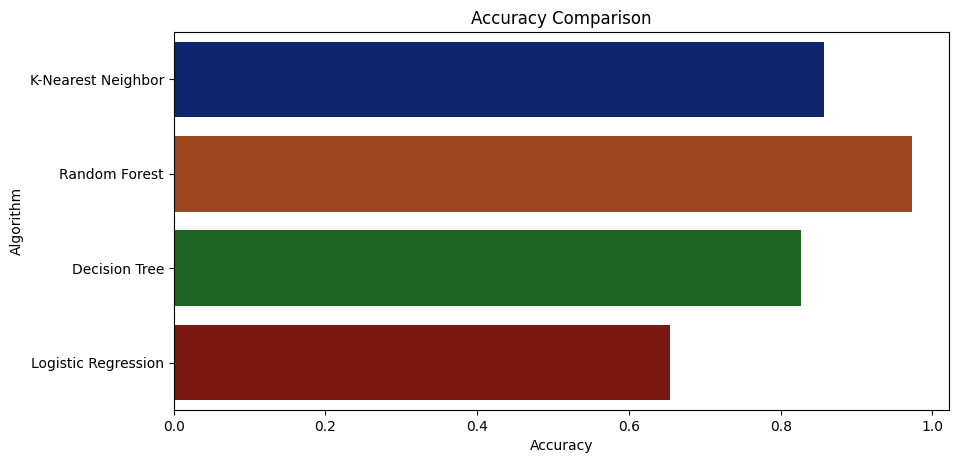

In [56]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [57]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

K-Nearest Neighbor --> 0.8568181818181818
Random Forest --> 0.9727272727272728
Decision Tree --> 0.8272727272727273
Logistic Regression --> 0.6545454545454545


In [62]:
data = np.array([[23, 60, 6, 140.]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [59]:
data = np.array([[40, 30, 3, 102]])
prediction = KNN.predict(data)
print(prediction)

['pigeonpeas']


In [60]:
# import firebase_admin
# from firebase_admin import credentials
# from firebase_admin import db

# # Fetch the service account key JSON file contents
# cred = credentials.Certificate('C:/Users/Swarup/Documents/Final Project/db-8266.json')
# # Initialize the app with a service account, granting admin privileges
# firebase_admin.initialize_app(cred, {
#     'databaseURL': "https://db-8266-default-rtdb.firebaseio.com/"
# })

# ref = db.reference('db-8266-default-rtdb/Humidity')
# ref = db.reference('/db-8266-default-rtdb')
# print(ref.get())
# tp=firebase.get('db-8266-default-rtdb',None)
# ah=tp['Temperature']
# atemp=tp['Moisture']
# shum=tp['Humidity']
# pH=tp['pH']
# rain=tp['LDR']
# print(tp)
# print(pH)
# print(ref.get())


In [61]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db

#run these if firebase asks for credentials / initialization.
# cred = credentials.Certificate('C:/Users/Swarup/Documents/Final Project/db-8266.json')
# firebase_admin.initialize_app(cred, {
#     'databaseURL': "https://db-8266-default-rtdb.firebaseio.com/"
# })
if not firebase_admin._apps:
    cred = credentials.Certificate(r'C:\Users\Siddhi\Downloads\Final-Year-Project-master (4)\Final-Year-Project-masterML/db-8211.json') 
    default_app = firebase_admin.initialize_app(cred, {
     'databaseURL': "https://crop-recommendation-syst-ae1ec-default-rtdb.firebaseio.com"})

ref = db.reference('/Temperature')
temp = ref.get()
ref = db.reference('/Humidity')
hum = ref.get()
ref = db.reference('/pH')
ph = ref.get()
ref = db.reference('/Moisture')
moist = ref.get()
data = np.array([[temp, hum, ph, moist]])
prediction = RF.predict(data)
print(prediction)

['pigeonpeas']
